# 5. Характеристики и параметры временных рядов. Практика

Выполните задания по проекту, опираясь на практику выше.

Помните, что в конце модуля вам нужно будет сдать на менторскую проверку Jupyter Notebook со всеми заданиями.

1. Загрузите датасет train.csv. Датасет состоит из данных для разных магазинов (store_nbr). Для каждого магазина для дат указан продукт и его количество ('unit_sales').

2. Задание будем выполнять для магазина с номером 25. Для этого сгруппируйте данные по дате и суммируйте количество всех продаж.

    Подсказка
   df = df[df.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index()

3. делайте сезонную декомпозицию.

4. В Jupyter Notebook ответьте на вопросы:

    4.1 Сколько элементов содержит исходный датасет?

    4.2 Сколько элементов содержит шумовая часть?

    4.3 Сколько числовых элементов содержит шумовая часть?

    4.4 Сколько элементов содержит сезонная часть?

    4.5 Сколько числовых элементов содержит трендовая часть?

5. Выполните тест Дики-Фуллера

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [ ]:

import zipfile

with zipfile.ZipFile('/home/as/PycharmProjects/ML15_TimeSeries/data/train.zip', "r") as z:
    z.extractall(path='/home/as/PycharmProjects/ML15_TimeSeries/data/')

In [ ]:
import pandas as pd
import pickle

in_path = './data/train.csv' #Path where the large file is
out_path = "./data/pkl" #Path to save the pickle files to
chunk_size = 4000000 #size of chunks relies on your available memory
separator = ","

reader = pd.read_csv(in_path,sep=separator,chunksize=chunk_size, low_memory=False)

for i, chunk in enumerate(reader):
    out_file = out_path + "/data_{}.pkl".format(i+1)
    with open(out_file, "wb") as f:
        pickle.dump(chunk,f,pickle.HIGHEST_PROTOCOL)

In [2]:
import glob
pickle_path = "./data/pkl" #Same Path as out_path i.e. where the pickle files are

data_p_files=[]
for name in glob.glob(pickle_path + "/data_*.pkl"):
   data_p_files.append(name)

In [5]:
df_1 = pd.DataFrame([])

for i in range(len(data_p_files))[0:8:1]:
    df_1 = df_1.append(pd.read_pickle(data_p_files[i]),ignore_index=True)

df_1 = df_1[df_1.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index()
df_1.to_csv('./data/df_1.csv', sep=',')


/tmp/ipykernel_53776/4135569826.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/4135569826.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/4135569826.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/4135569826.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/4135569

In [6]:
df_2 = pd.DataFrame([])

for i in range(len(data_p_files))[8:16:1]:
    df_2 = df_2.append(pd.read_pickle(data_p_files[i]),ignore_index=True)

df_2 = df_2[df_2.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index()
df_2.to_csv('./data/df_2.csv', sep=',')

/tmp/ipykernel_53776/473461454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/473461454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/473461454.py:4: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_2 = df_2.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/473461454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [7]:
df_3 = pd.DataFrame([])

for i in range(len(data_p_files))[16:24:1]:
    df_3 = df_3.append(pd.read_pickle(data_p_files[i]),ignore_index=True)

df_3 = df_3[df_3.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index()
df_3.to_csv('./data/df_3.csv', sep=',')

/tmp/ipykernel_53776/2024901488.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3 = df_3.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/2024901488.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3 = df_3.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/2024901488.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3 = df_3.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/2024901488.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3 = df_3.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/2024901

In [8]:
df_4 = pd.DataFrame([])

for i in range(len(data_p_files))[24:33:1]:
    df_4 = df_4.append(pd.read_pickle(data_p_files[i]),ignore_index=True)

df_4 = df_4[df_4.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index()
df_4.to_csv('./data/df_4.csv', sep=',')

/tmp/ipykernel_53776/3165218903.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_4 = df_4.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/3165218903.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_4 = df_4.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/3165218903.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_4 = df_4.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/3165218903.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_4 = df_4.append(pd.read_pickle(data_p_files[i]),ignore_index=True)
/tmp/ipykernel_53776/3165218

In [9]:

df = pd.concat([df_1, df_2, df_3, df_4], axis=0)
df.head(5)

,date,unit_sales
0,2014-09-30,4979.975
1,2014-10-01,7277.056
2,2014-10-02,6824.340
3,2014-10-03,8912.556
4,2014-10-04,9639.816


In [10]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['date']))

In [11]:
df.head() # смотрим на результат

,date,unit_sales
date,,
2014-09-30,2014-09-30,4979.975
2014-10-01,2014-10-01,7277.056
2014-10-02,2014-10-02,6824.340
2014-10-03,2014-10-03,8912.556
2014-10-04,2014-10-04,9639.816


In [12]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['date'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,unit_sales
date,
2014-09-30,4979.975
2014-10-01,7277.056
2014-10-02,6824.340
2014-10-03,8912.556
2014-10-04,9639.816


In [34]:
df.to_csv('./data/train_data.csv', sep=',')

In [35]:
df= pd.read_csv('./data/train_data.csv', sep=',')
df.head()

,date,unit_sales
0,2014-09-30,4979.975
1,2014-10-01,7277.056
2,2014-10-02,6824.340
3,2014-10-03,8912.556
4,2014-10-04,9639.816


In [36]:
df = df.set_index('date')
df.head()

,unit_sales
date,
2014-09-30,4979.975
2014-10-01,7277.056
2014-10-02,6824.340
2014-10-03,8912.556
2014-10-04,9639.816


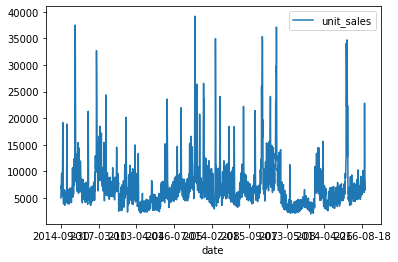

In [37]:
df.plot();

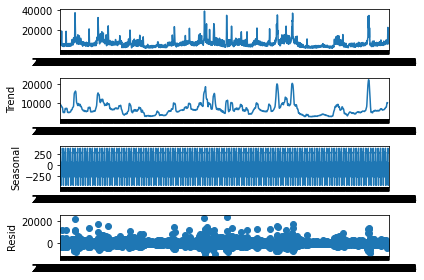

Критерий Дики-Фуллера: p=0.000002


In [38]:
import statsmodels.api as sm
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
decomposition.plot()
pyplot.show() # любуемся результатом
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.unit_sales)[1])

### TimeSeriesSplit

In [39]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5, test_size=7)

for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

In [44]:
df['rolling_mean'] = df.rolling(window=23).mean()

In [45]:
df

,unit_sales,rolling_mean
date,,
2014-09-30,4979.975,NaN
2014-10-01,7277.056,NaN
2014-10-02,6824.340,NaN
2014-10-03,8912.556,NaN
2014-10-04,9639.816,NaN
...,...,...
2017-08-11,22800.841,8285.96913
2017-08-12,15090.753,8733.92287
2017-08-13,8570.598,8763.05700


# 8. Расчёт факторов при помощи pandas. Практика
Продолжайте выполнять проект в Jupyter Notebook.

1. Выберите временной ряд для одного магазина (можно использовать из прошлого задания).

2. Постройте скользящее среднее c окном 5.

3. Постройте скользящее квадратическое отклонение c окном 5.

4. Постройте так называемые линии Боллинджера с окном в 30 (если этого позволяет выбранный ряд): добавьте к скользящему среднему скользящее стандартное отклонение, умноженное на три — верхняя линия Боллинджера; отнимите от скользящего среднего скользящее стандартное отклонение, умноженное на три — нижняя линия Боллинджера.
        upper = rolling_mean + 3 * rolling_std
        lower = rolling_mean - 3 * rolling_std
5. Отобразите эти оконные факторы на графике.

6. Постройте оконное среднее с окном в 10 точек.

7. Постройте экспоненциально среднее с окном в 7 точек (span=7).

8. Отобразите их на отдельном графике.

9. Напишите свою скользящую функцию, которая будет являться средним арифметическим между максимальным и минимальным значением unit_sales, используя окно 10.

10. Постройте скользящее среднее с окном 50 и экспоненциальное скользящее среднее с окном 10 (span=10). Укажите индексы датафрейма, на которых одно скользящее пересекается с другим. Для этого вычтите из одно скользящего среднего другое, возьмите знак этой разности (np.sign), продифференциируйте его (diff()) и оставьте только те точки, где результат дифференциирования не равен нулю.

11. Получите лаговые факторы с 7-го по 10-й предыдущих дня (лаг7, лаг8, лаг9, лаг10) и отобразите на графике.

In [295]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [296]:
%matplotlib inline

In [297]:
df= pd.read_csv('./data/train_data.csv')
df.head()

,date,unit_sales
0,2014-09-30,4979.975
1,2014-10-01,7277.056
2,2014-10-02,6824.340
3,2014-10-03,8912.556
4,2014-10-04,9639.816


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1618 non-null   object 
 1   unit_sales  1618 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.4+ KB


In [299]:
df['date'] = pd.to_datetime(df.date)
df = df.iloc[1000:1100]
df = df.reset_index(drop=True)

In [300]:
def rolling_calc(N):

    sma = df.unit_sales.rolling(window=N).mean() # 2. Cкользящее среднее
    std = df.unit_sales.rolling(window=N).std()# 3. скользящее квадратическое отклонение
    upper_band = sma + 3 * std #bollinger_bands upper
    lower_band = sma - 3 * std #bollinger_bands lower
    ema = df.unit_sales.ewm(min_periods=N, span=N).mean()
    max_min_mean = (df.unit_sales.rolling(window=N).max() - df.unit_sales.rolling(window=N).min()).apply(np.mean) # (max.value - min.value).mean()

    return sma, std, upper_band, lower_band, ema, max_min_mean

## 2, 3 скользящее среднее и скользящее квадратическое отклонение c окном 5.

In [301]:
N = 5 # Окно в N точек
sma_5, std_5, upper_band_5, lower_band_5, ema_5, max_min_mean_5 = rolling_calc(N)

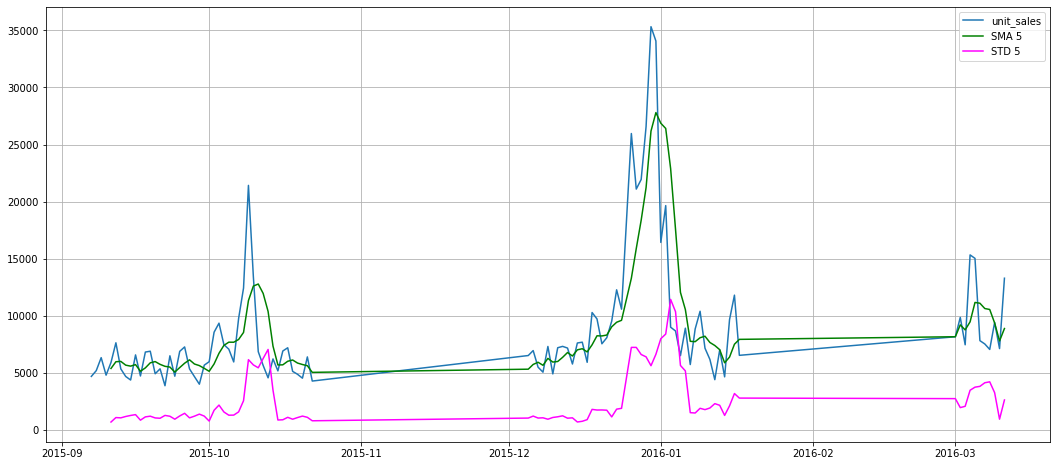

In [302]:

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.date, df.unit_sales) ## исходные данные

ax.plot(df.date, sma_5,  c='g') ## оконное среднее
ax.plot(df.date, std_5,  c='magenta') ## скользящее квадратическое отклонение c окном 5.

ax.legend(['unit_sales', 'SMA ' + str(N), 'STD ' + str(N)])
ax.grid()

## 4, 5 линии Боллинджера с окном в 30 точек с визуализацией

In [303]:
N = 30 # Окно в N точек
sma_30, std_30, upper_band_30, lower_band_30, ema_30, max_min_mean_30 = rolling_calc(N)

df_30 = df.copy()
df_30['upper_band_30'] = upper_band_30
df_30['lower_band_30'] = lower_band_30


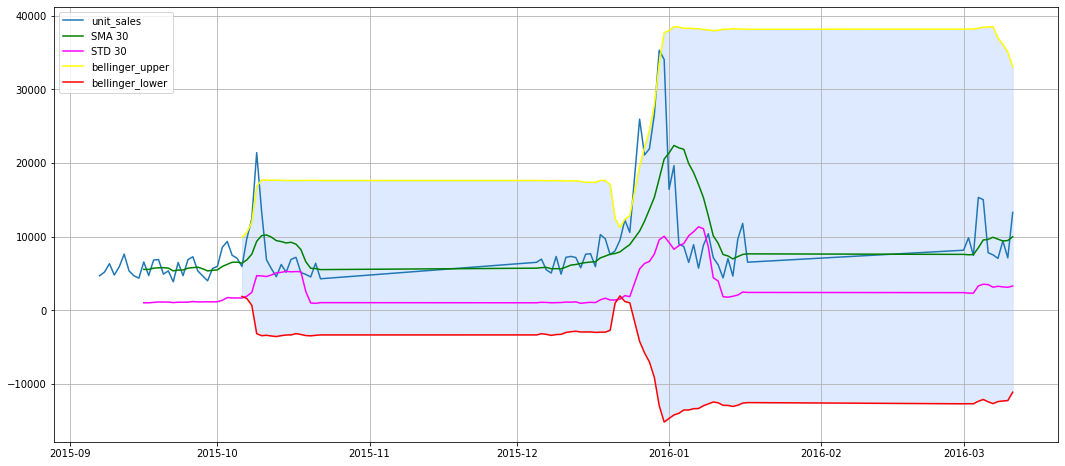

In [304]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.date, df.unit_sales) ## исходные данные

ax.plot(df.date, sma,  c='g') ## оконное среднее
ax.plot(df.date, std,  c='magenta') ## скользящее квадратическое отклонение.
ax.plot(df.date, df_30['upper_band_30'],  c='yellow')
ax.plot(df.date, df_30['lower_band_30'],  c='red')
ax.fill_between(df.date, df_30['upper_band_30'], df_30['lower_band_30'] , color='#ADCCFF', alpha=0.4)

ax.legend(['unit_sales', 'SMA ' + str(N), 'STD ' + str(N),'bellinger_upper', 'bellinger_lower' ])
ax.grid()

## 6,7,8  оконное среднее с окном в 10 точек и экспоненциально среднее с окном в 7 точек с визуализацией

In [305]:
N = 10 # Окно в N точек
sma_10, std_10, upper_band_10, lower_band_10, ema_10, max_min_mean_10 = rolling_calc(N)

In [306]:
N = 7# Окно в N точек
sma_7, std_7, upper_band_7, lower_band_7, ema_7, max_min_mean_7 = rolling_calc(N)

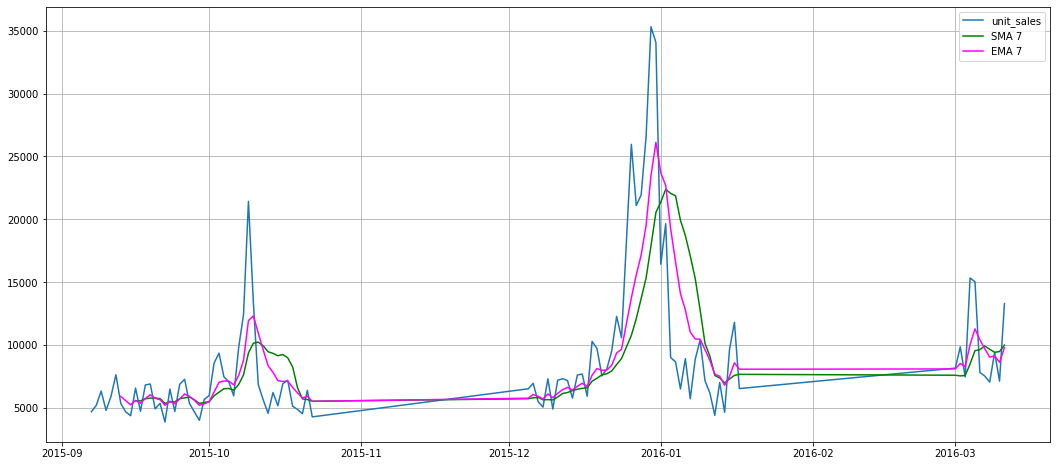

In [307]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.date, df.unit_sales) ## исходные данные

ax.plot(df.date, sma_10,  c='g') ## оконное среднее
ax.plot(df.date, ema_7,  c='magenta') ## скользящее экспоненциально среднее.

ax.legend(['unit_sales', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

## 9 скользящая функция средне арифметического между максимальным и минимальным значением unit_sales, используя окно 10

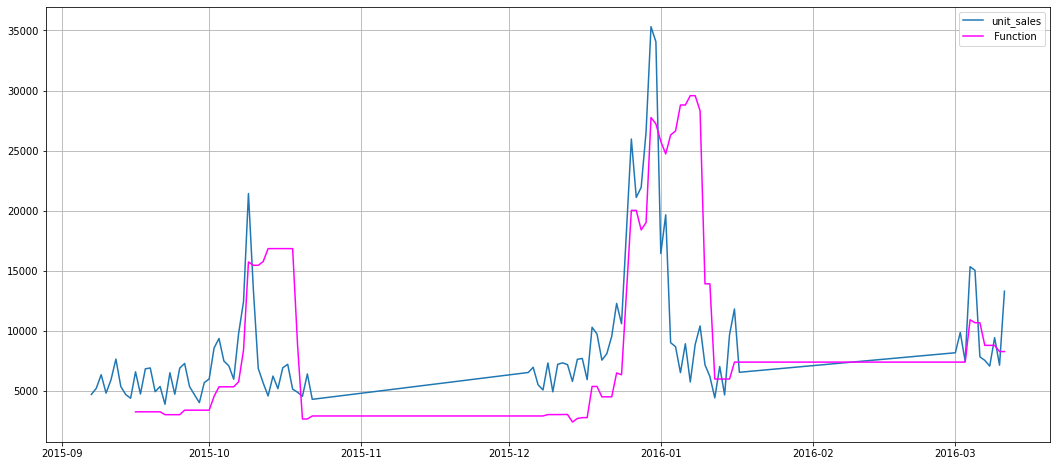

In [308]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.date, df.unit_sales) ## исходные данные

ax.plot(df.date, max_min_mean_10,  c='magenta') ## оконное среднее

ax.legend(['unit_sales', ' Function'])
ax.grid()

## 10. Cкользящее среднее с окном 50 и экспоненциальное скользящее среднее с окном 10 (span=10)

In [309]:
N = 50 # Окно в N точек
sma_50, std_50, upper_band_50, lower_band_50, ema_50, max_min_mean_50 = rolling_calc(N)

In [310]:
df_diff = df.copy()
df_diff['sma_50'] = sma_50
df_diff['ema_10'] = ema_10
df_diff['diff'] = (df_diff.sma_50 - df_diff.ema_10).apply(np.sign).diff()
df_diff.sample(5)

,date,unit_sales,sma_50,ema_10,diff
31,2015-10-08,12436.447,NaN,8210.042631,NaN
53,2015-12-12,7333.946,6657.98876,6378.456037,0.0
81,2016-01-10,7172.088,10448.93188,10849.927182,0.0
96,2016-03-08,7065.478,10835.20386,9207.637559,0.0
75,2016-01-04,8681.174,10539.00460,17286.065910,0.0


In [311]:

df_diff = df_diff.query('diff != 0')
df_diff

,date,unit_sales,sma_50,ema_10,diff
0,2015-09-07,4706.455,NaN,NaN,NaN
1,2015-09-08,5211.730,NaN,NaN,NaN
2,2015-09-09,6346.252,NaN,NaN,NaN
3,2015-09-10,4816.217,NaN,NaN,NaN
4,2015-09-11,5923.518,NaN,NaN,NaN
5,2015-09-12,7647.892,NaN,NaN,NaN
6,2015-09-13,5363.772,NaN,NaN,NaN
7,2015-09-14,4698.774,NaN,NaN,NaN
8,2015-09-15,4388.979,NaN,NaN,NaN
9,2015-09-16,6587.351,NaN,5604.918521,NaN


## 11 Лаги

In [313]:
for i in range(7,11):
    df['lag_{}'.format(i)] = df.unit_sales.shift(i)

In [314]:
df

,date,unit_sales,lag_7,lag_8,lag_9,lag_10
0,2015-09-07,4706.455,NaN,NaN,NaN,NaN
1,2015-09-08,5211.730,NaN,NaN,NaN,NaN
2,2015-09-09,6346.252,NaN,NaN,NaN,NaN
3,2015-09-10,4816.217,NaN,NaN,NaN,NaN
4,2015-09-11,5923.518,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,2016-03-07,7543.022,6549.948,11817.342,9677.275,4666.068
96,2016-03-08,7065.478,8175.590,6549.948,11817.342,9677.275
97,2016-03-09,9431.355,9866.874,8175.590,6549.948,11817.342
98,2016-03-10,7140.754,7472.913,9866.874,8175.590,6549.948


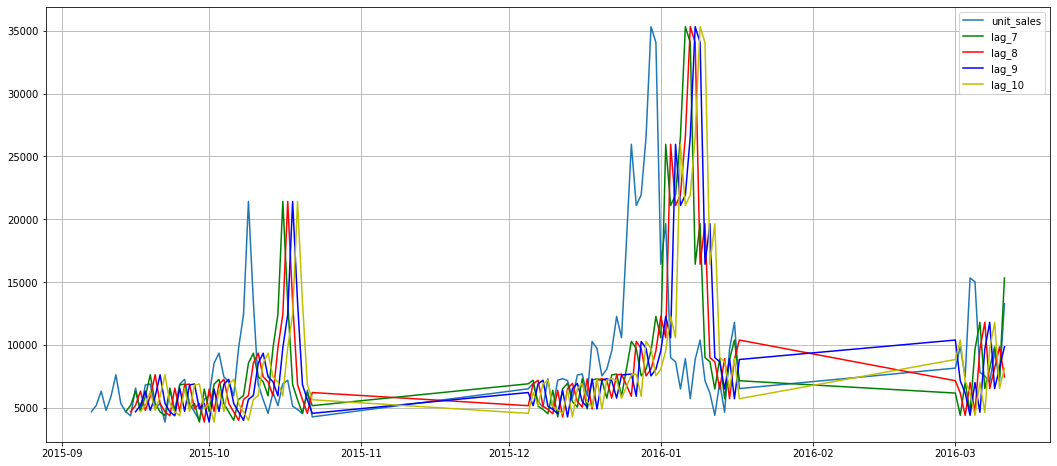

In [315]:

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.date, df.unit_sales) ## исходные данные
ax.plot(df.date, df['lag_' + str(7)],  c='g')
ax.plot(df.date, df['lag_' + str(8)],  c='r')
ax.plot(df.date, df['lag_' + str(9)],  c='b')
ax.plot(df.date, df['lag_' + str(10)],  c='y')

ax.legend(['unit_sales', 'lag_7', 'lag_8', 'lag_9', 'lag_10'])
ax.grid()